# Export of static images

Bokeh supports the export of PNG and SVG.

## PNG export

Bokeh supports the export of a plot or layout to the PNG image format using the `export_png` function. This function contains a Bokeh object to be exported and a file name in which the PNG output is to be written. The bokeh object transferred to `export_png` is often a single representation, but this does not have to be the case. When a layout is exported, the entire layout is saved in a PNG image.

``` bash
$ spack env activate python-38
$ spack install py-selenium@3.141.0%gcc@11.2.0
$ py-pillow@8.0.0%gcc@11.2.0~freetype~imagequant+jpeg~jpeg2000~lcms~tiff~webp~webpmux~xcb+zlib
```

After installing Selenium, you need to download and install the [geckodriver](https://github.com/mozilla/geckodriver/releases) binary. Make sure that `geckodriver` is available in `PATH`. You can find more information in the [geckodriver documentation](https://firefox-source-docs.mozilla.org/testing/geckodriver/Usage.html). Finally, Firefox must also be available on your system.

In [1]:
import pandas as pd

from bokeh.plotting import figure
from bokeh.sampledata.stocks import AAPL


df = pd.DataFrame(AAPL)
df["date"] = pd.to_datetime(df["date"])

In [2]:
from bokeh.io import export_png


p = figure(width=800, height=250, x_axis_type="datetime")
p.line(df["date"], df["close"], color="navy", alpha=0.5)

export_png(p, filename="plot.png")

'/Users/veit/cusy/trn/pyviz-tutorial/docs/bokeh/embedding-export/plot.png'

## SVG export

Bokeh can also generate SVG output in the browser instead of rendering HTML `canvas` elements. This is achieved by setting `output_backend = "svg"` for a `figure`. The SVG can then be embedded either in HTML files with `output_file` or in content created with `components`. Alternatively, `.svg` files can also be created with `export_svgs`. Please note that an SVG file is created for each HTML `canvas` element; however, it is not possible to create complete layouts or widgets in an SVG file.

In [3]:
from bokeh.io import export_svgs


p = figure(width=800, height=250, x_axis_type="datetime", output_backend="svg")
p.line(df["date"], df["close"], color="navy", alpha=0.5)

export_svgs(p, filename="plot.svg")

['plot.svg']

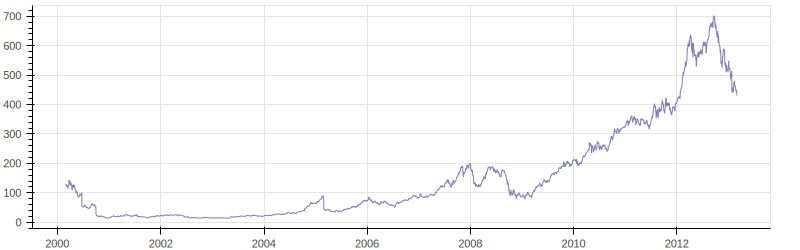

In [4]:
from IPython.display import SVG


SVG("plot.svg")